## Importing dependencies

In [2]:
from fastai.vision.all import *
from tkinter import filedialog
from time import sleep
from PIL import Image

# Train

In [39]:
# defizione classe di insetti che il modello deve riconoscere
searches = 'Lucilia Sericata', 'Musca Domestica', 'Piophilidae'
path = filedialog.askdirectory(title="Seleziona una cartella")
actual_dataset = "mixed"
# verifica integrità delle immagini, solo se possono essere aperte e non hanno altri problemi che invalidano
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)  # se non passa vengono rimosse
total_images = len(get_image_files(path))
valid_images = total_images - len(failed)
# numero di immagini non valide
print("path:"+path+"fallite:", len(failed), "riuscite:", valid_images)

path:H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internetfallite: 0 riuscite: 1017


## No data augmentation

C:\Users\menga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


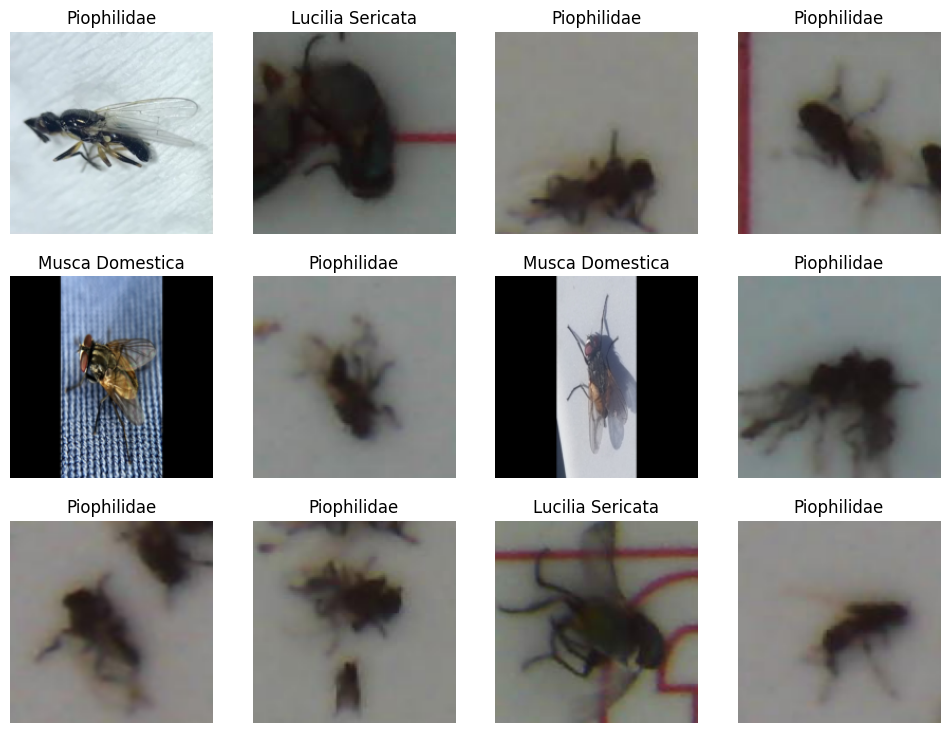

In [40]:
dlsnda = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #specifica che stiamo lavorando in blocchi di immagini e categorie
    get_items=get_image_files, #indica come ottenere elengo immagini nella directory specificata
    splitter=RandomSplitter(valid_pct=0.2, seed=42), #divide casualmente il dataset in set di addestramento e e di validazione (20%)
    get_y=parent_label, #determina come ottenere le etichette dai percorsi dei file 
    item_tfms=[Resize((192, 192), method='squish')], #trasformazioni sulle singole immagini
).dataloaders(path, bs=32) #creazione degli oggetti dataloaders con il datablock precedente, bs dimensione del batch (paralellizzazione del batch su GPU)

dlsnda.show_batch(max_n=12)

In [41]:
# Definisci la funzione per il salvataggio e l'esportazione del modello
def save_and_export(learner, epoch):
    learner.save(f'insectacam-weights-{actual_dataset}-nda-{epoch}')
    learner.export(f'insectacam-{actual_dataset}-nda-{epoch}.pkl')

# Crea il tuo vision learner
learn = vision_learner(dlsnda, resnet18, metrics=error_rate)
learn.path = Path(".\learner")
learn.model_dir = Path(".\models")

# Imposta il numero totale di epoche
total_epochs = 15

# Addestra il modello
for epoch in range(1, total_epochs + 1):
    print(f"Training for {epoch} epochs on {actual_dataset} dataset on path: {path}")
    
    # Addestra per una singola epoca
    learn.fit_one_cycle(1)
    
    # Salva e esporta il modello dopo 5, 10 e 15 epoche
    if epoch in [5,10, 15]:
        save_and_export(learn, epoch)

print("Training completed.")


Training for 1 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.925734,0.332101,0.137931,01:01


Training for 2 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.345199,0.162127,0.059113,00:59


Training for 3 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.206896,0.109307,0.049261,01:01


Training for 4 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.114923,0.121577,0.049261,00:56


Training for 5 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.102565,0.106026,0.029557,01:02


Training for 6 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


C:\Users\menga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,error_rate,time
0,0.121900,0.094709,0.029557,01:02


Training for 7 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.057698,0.113650,0.044335,01:01


Training for 8 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.044367,0.089736,0.039409,01:04


Training for 9 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.087033,0.153844,0.059113,01:03


Training for 10 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.044175,0.116106,0.039409,01:02


Training for 11 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


C:\Users\menga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,error_rate,time
0,0.060576,0.109262,0.039409,00:58


Training for 12 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.052999,0.113051,0.039409,00:58


Training for 13 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.046146,0.114372,0.039409,00:56


Training for 14 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.022606,0.117592,0.039409,00:53


Training for 15 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.040525,0.119752,0.049261,00:59


Training completed.


## Data aumentation

C:\Users\menga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


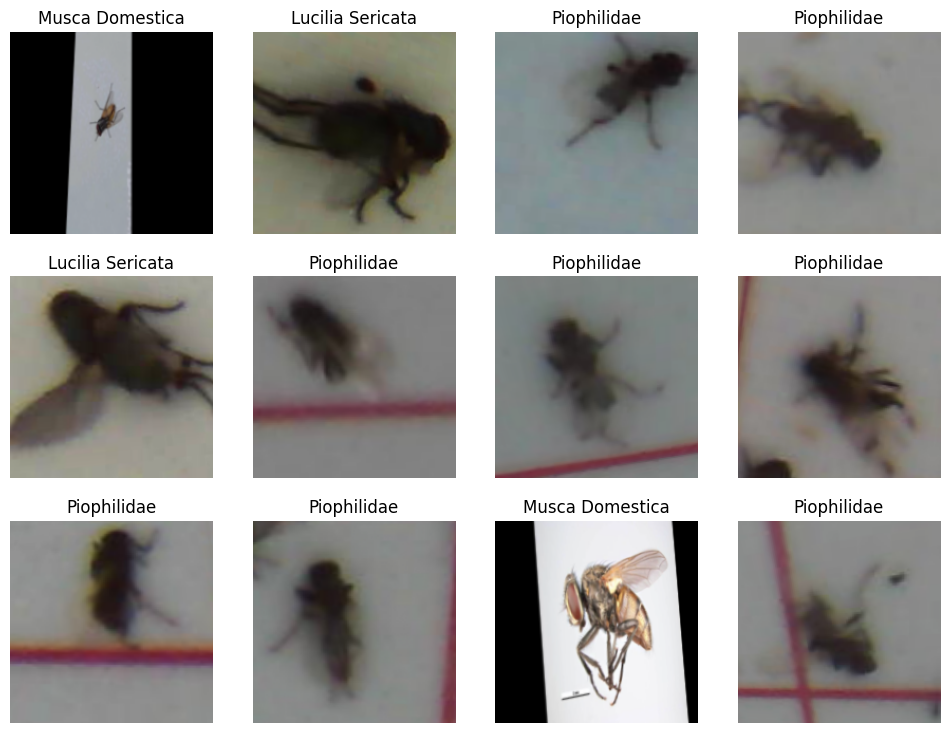

In [42]:
dlsda = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #specifica che stiamo lavorando in blocchi di immagini e categorie
    get_items=get_image_files, #indica come ottenere elengo immagini nella directory specificata
    splitter=RandomSplitter(valid_pct=0.2, seed=42), #divide casualmente il dataset in set di addestramento e e di validazione (20%)
    get_y=parent_label, #determina come ottenere le etichette dai percorsi dei file 
    item_tfms=[Resize((192, 192), method='squish')], #trasformazioni sulle singole immagini
    batch_tfms=aug_transforms(), #trasformazioni al batch di immagini
).dataloaders(path, bs=32) #creazione degli oggetti dataloaders con il datablock precedente, bs dimensione del batch (paralellizzazione del batch su GPU)

dlsda.show_batch(max_n=12)

In [43]:
# Definisci la funzione per il salvataggio e l'esportazione del modello
def save_and_export(learner, epoch):
    learner.save(f'insectacam-weights-{actual_dataset}-da-{epoch}')
    learner.export(f'insectacam-{actual_dataset}-da-{epoch}.pkl')

# Crea il tuo vision learner
learn = vision_learner(dlsda, resnet18, metrics=error_rate)
learn.path = Path(".\learner")
learn.model_dir = Path(".\models")

# Imposta il numero totale di epoche
total_epochs = 15

# Addestra il modello
for epoch in range(1, total_epochs + 1):
    print(f"Training for {epoch} epochs on {actual_dataset} dataset on path: {path}")
    
    # Addestra per una singola epoca
    learn.fit_one_cycle(1)
    
    # Salva e esporta il modello dopo 5, 10 e 15 epoche
    if epoch in [5, 10, 15]:
        save_and_export(learn, epoch)

print("Training completed.")

Training for 1 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,1.120222,0.374170,0.133005,01:05


Training for 2 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.458832,0.237231,0.073892,00:57


Training for 3 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.363422,0.169830,0.059113,00:52


Training for 4 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.230321,0.141988,0.039409,00:52


Training for 5 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.181299,0.174382,0.064039,00:55


Training for 6 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


C:\Users\menga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,error_rate,time
0,0.177717,0.161962,0.068966,01:01


Training for 7 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.136954,0.149612,0.044335,00:56


Training for 8 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.148422,0.154713,0.034483,00:58


Training for 9 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.109100,0.159741,0.039409,00:55


Training for 10 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.099940,0.131253,0.044335,00:53


Training for 11 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


C:\Users\menga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,error_rate,time
0,0.104344,0.139127,0.029557,00:53


Training for 12 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.087121,0.133254,0.039409,01:01


Training for 13 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.083891,0.120939,0.034483,00:56


Training for 14 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.066569,0.123441,0.039409,00:51


Training for 15 epochs on mixed dataset on path: H:/Il mio Drive/Personal/University/Master's/Complex System Desygn/InsectaCam/datasets/training/training-mondo-novo-internet


epoch,train_loss,valid_loss,error_rate,time
0,0.086751,0.106480,0.029557,00:53


Training completed.
